Let's get started with a little something that I prepared, now that my favourite football team -- Real Madrid -- has won the LaLiga championship.

In this case, I'm going to use [machine learning](https://en.wikipedia.org/wiki/Machine_learning) to cluster football players into four groups.

Long story short: can data make out who is goalkeeper, defender, midfielder or forward?

I understand this could be a good starting point for this blog's very first season. But let's not count our chickens before they are hatched, and take off from solid foundations.

Whatever we do in Data Science, we should always be guided by the following framework.

1) Ask a question

2) Gather data

3) Explore

4) Model

5) Communicate

Given the question "Can data make out football players the way humans do?", let's go straight to step 2. Using information available at the Spanish sport magazine [Marca](http://www.marca.com/), I put together a table named "DataSet2.xlsx" (see the project [on github](https://github.com/ohduran/MachineLearning_Football_clustering))


In [1]:
import pandas as pd

df2 = pd.ExcelFile('DataSet2.xlsx').parse('Sheet1')

df2 stores as a DataFrame whatever is in this Excel sheet, which is a list of all Real players with their season information available:

- Name
- Shirt number
- Matches played
- Stops (Saves) per match
- Goals Right Foot per match
- Goals Left Foot per match
- Goals Head per match
- Shoots Right Foot per match
- Shoots Left Foot per match
- Shoots Head per match
- Yellow Cards per match
- Red Cards per match
- Offsides per match
- Assistances per match
- Ball losses per match
- Ball recoveries per match

What we are going to do is using a Python library called sci-learn, and more specifically, the KMeans class. It uses all this players' data as data points, and iteratively calculates a "center of mass" to which data is assumed to gravitate.

That is: data is assumed to answer question in step 1 as "Yes". So we work under that assumption to classify players and see what are the features of goalkeepers, midfielders, ... that make them so.

In [2]:
#this will get rid of Names and Matches played for now, 
#because they are just labels
df = df2.ix[:,3:] 

#this will be the names table, for reference.
df_label = df2.ix[:,:1]

#this are matches played for each player
df_mplayed = df2.ix[:,2:3]

#Show, as an example, the first 5 players' 6 first attributes
df2.iloc[:5, :7]

,Name,Shirt,Match played,Stops pM,Goals RF pM,Goals LF pM,Goals H pM
0,Navas,1,26,3.076923,0.000000,0.0,0.000000
1,Carvajal,2,26,0.000000,0.000000,0.0,0.000000
2,Pepe,3,13,0.000000,0.000000,0.0,0.230769
3,Ramos,4,27,0.000000,0.037037,0.0,0.222222
4,Varane,5,22,0.000000,0.000000,0.0,0.090909


Now, we need to store this as a Numpy array so we can perform Machine Learning on it. Seems like the ML library doesn't go with pandas, and there have been efforts to acommodate one another (based on me googling here and there).

Instead, we can write a bit of code in this case, luckily.

In [3]:
import numpy as np
#Define the list of features
columns = list(df.columns.values)
#Allocate some memory for the matrix using a zeroes matrix
c = [[0 for y in range(len(columns))] for x in range(len(df_label))]

# Fill process #

#row is the subset of columns with index i, 
#or the i-th row
for i in range (len(df_label)):
    row = df.iloc[i]
    for j in range(len(columns)):
        c[i][j]=row[columns[j]]

#Now, numpy takes the matrix and creates the numpy array
X = np.array(c)

Python is great because I don't need to think of memory leaks at this point. I may be losing in speed, but it saves me from a lot of headaches.

The process was fairly simple: for each player in the DataFrame, indexed with letter i, go through each column j and store it in a matrix c as the item (i,j). Later, just store it as a numpy array.

Let's work the sklearn magic and cluster our data in k=4 groups: goalkeepers, defenders, midfielders, and forwards.

In [4]:
from sklearn.cluster import KMeans

k=4

#We create a KMeans with k number of clusters,
# and set up the process

kmeans = KMeans(n_clusters = k)
kmeans.fit(X)
centroids = kmeans.cluster_centers_ #centroids coordinates


Now let's visualised how the code clustered the players.

In [5]:
#Let's classify all players by their closest cluster.

#To do so, let's define distance
def dist_to_nth_centroid(arr,n):
    length = len(arr)
    sum = 0
    centroid_n = centroids[n]
    for i in range(length):
        sum += (arr[i]-centroid_n[i])**2
    return sum

#Now, for each element in X we are calculating the distance
#and appends its name into the list under the i-th centroid.


#Names of the players
names =[list(df_label.values[i])[0] for i in range(len(df_label))]
P = len(names) #number of players


#We are storing players under the same index using a dictionary
dic = {}
for n in range(k):
    dic[n] = []#allocating memory statically
    
# Loop into distance to each centroid, and store the minimum

# i will denote the player (i < P); n the centroid (n < k)

for i in range(P):
    #Initial values when we start the loop
    d = dist_to_nth_centroid(X[i],0)#initial distance is the distance to the centroid
    x = 0 #initial cluster value as zero
    for n in range(1,k):
        dd = dist_to_nth_centroid(X[i],n)
        
        #if distance to the new cluster is less, change
        if dd <d:
            d = dd #change distance value
            x = n #change cluster value
    # Once we have figured out the closest cluster x,
    # let's store it in the dict list under i
    dic[x].append(names[i])


And let's present our results, with the non-zero features of each centroid as the KPIs (Key Performance Indicator):

In [6]:
z = list(centroids)
for i in range(0,len(centroids)):
    z = list(centroids[i])
    print "Centroid",i
    for player in dic[i]:
        print player,
    print ""
    print ""
    for j in range(len(z)):
        z[j] = int(round(z[j]))
        if z[j] != 0:
            print columns[j],
            print z[j]
    print ""

Centroid 0
Carvajal Kroos Marcelo Modric Danilo 

Ball losses pM 8
Ball recoveries pM 6

Centroid 1
Ronaldo Benzema James Bale Coentrao Kovacic Vazquez Asensio Morata Isco 

Shoots RF pM 1
Shoots LF pM 1
Ball losses pM 6
Ball recoveries pM 2

Centroid 2
Navas Casilla Mariano 

Stops pM 2
Ball losses pM 1

Centroid 3
Pepe Ramos Varane Nacho Casemiro 

Ball losses pM 5
Ball recoveries pM 9



This shows some potential: it can make out goalkeepers (although it includes Mariano too, which makes some sense as his stats are practically nil), defenders and, oddly enough, wings like Carvajal, Marcelo and Danilo, mixed with Kroos and Modric, midfielders. The remaining are stored mixed: some forwards, midfielders and wings.

It also looks like we are differentiating left- from right-footers, and we are unable to cluster them together if there is a reason to.
We can sort that out by including total goals as the sum of all goals, and total shoots as the sum of all shoots.

There is obviously something missing: a bigger sample. 

Let me rearrange everything into a new function, and now include... FC Barcelona, and Atletico de Madrid players...


_laughs villainly_

In [7]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans

def main(F, sheet, k):

    df3 = pd.ExcelFile(F).parse(sheet)


    df = df3.ix[:,3:] #this will get rid of Names and Matches played for now, because they are just labels
    df_label = df3.ix[:,:1]#this will be the names table, for reference.
    df_mplayed = df3.ix[:,1:2] #this are match played

    #Define the list of features
    columns = list(df.columns.values)
    #Allocate some memory for the matrix using a zeroes matrix
    c = [[0 for y in range(len(columns))] for x in range(len(df_label))]

    #Fill: row is the subset of columns with index i (yes, the i-th row), and fills the c matrix
    for i in range(len(df_label)):
        row = df.iloc[i]
        for j in range(len(columns)):
            c[i][j] = row[columns[j]]
    #Numpy takes the matrix and creates the Numpy array
    X = np.array(c)

    # We create a kmeans class with k number of clusters
    kmeans = KMeans(n_clusters = k)

    #And we set up the cluster process
    kmeans.fit(X)
    centroids = kmeans.cluster_centers_ #centroids coordinates
    #Careful with the final underscore

    #Let's create a dict with all the players on each cluster. 
    #To do so, we need to define distance to the centroid.

    def dist_to_nth_centroid(arr,n):
        length = len(arr)
        sum = 0
        centroid_n = centroids[n]
        for i in range(length):
            sum += (arr[i]-centroid_n[i])**2
        return sum

    #Now, for each element in X we are calculating the distance to each centroid,
    #and append its name into the list under the i-th centroid.

    #Name of players
    names = [list(df_label.values[i]) for i in range(len(df_label))]
    L = len(names) #number of players
    dic = {} #we store players here, under the same index a if they are closest to the a-th centroid
    for n in range(k):
        dic[n] = []

    #i will denote the player (i < L); n the centroid (n < k)


    for i in range(L):
        for n in range(k):
            #Initial values when we start the loop
            if n == 0:
                d = dist_to_nth_centroid(X[i],n)#initial distance value
                x = n #initial cluster value
            else:
                dd = dist_to_nth_centroid(X[i],n)

                #if distance to the new cluster is less than whatever we had before
                if dd < d:
                    d = dd#change distance value
                    x = n #change cluster value

        # After the loop, x is the closest cluster. Let's store the name under the correct cluster
        dic[x].append(str(names[i][0]))

    z = list(centroids)
    for i in range(0,len(centroids)):
        z = list(centroids[i])
        print "Centroid",i
        for player in dic[i]:
            print player,
        print ""
        print ""
        for j in range(len(z)):
            z[j] = int(round(z[j]))
            if z[j] != 0:
                print columns[j],
                print z[j]
        print ""
    return dic
    

Now that everything seems defined, let's call the function

In [8]:
F = 'DataSet4.xlsx'
sheet = 'Sheet2'
k = 4
r= main(F, sheet, k)

Centroid 0
Benzema James Coentrao Kovacic Vazquez Asensio Morata Isco Rakitic Denis Turan Iniesta Rafinha Alcacer Gomes Tiago Torres Carrasco Correa Gameiro 

Total shoots pM 1
Shoots RF pM 1
Ball losses pM 5
Ball recoveries pM 2

Centroid 1
Navas Casilla Stegen Moya Oblak 

Saves pM 4

Centroid 2
Ronaldo Bale Marcelo Suarez Messi Neymar Griezmann 

Total goals pM 1
Total shoots pM 3
Shoots RF pM 1
Shoots LF pM 2
Offsides pM 1
Ball losses pM 10
Ball recoveries pM 2

Centroid 3
Carvajal Pepe Ramos Varane Nacho Kroos Casemiro Modric Danilo Pique Busquets Mascherano Alba Digne Roberto Vidal Umtiti Mathieu Godin Filipe Luis Koke Saul Gabi Savic Vrsaljko Juanfran Gimenez 

Total shoots pM 1
Ball losses pM 6
Ball recoveries pM 8



OK, goalkeepers remained, as well as forwards (look at Marcelo there, he's a character). But, looking closely, there is no real difference between midfielders and defenders.

#IsThatAGlitch?

Don't think so. See, the main attributes for the centroid that includes Ramos, Pique, Godin, Busquets, Modric, Koke, ... it's not just ball recoveries, but its loss/recovery ratio. It is, in fact, the main feature between all non-goalies groups.

#### Loss to Recovery ratio

-"Defenders" = 0.75

-"Midfielders" = 2.50

-"Forwards" = 5.00

That signals three things, in my opinion: 

1) Forwards are indeed those that risk the most possession: they essentially play to shoot as many times as they can, as effectively as possible; the more forward on the field you are, the greater the L2R ratio will be.

2) Defenders are those that focuses on recoveries: they play to protect the goalie, and to ensure that the team has the ball as much as possible: the more defender you are, the lesser the L2R ratio will be.

3) Those on the midfield are inbetween these two trends: they risk that last pass, invent new plays and game on. They are the team's engine room.

Let me plot RM players ball losses against ball recoveries to see if there is any trend.

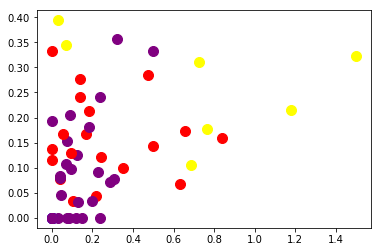

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

F = 'DataSet4.xlsx'
sheet = 'Sheet2'
df2 = pd.ExcelFile(F).parse(sheet)

#r is the dictionary retured by main()

def what_is_the_player_key(dic,player):#this will loop through the dictionary and return the key for a given player
    for key in dic:
        if player in dic[key]:
            return key
    return -1 #if not in dic, it will return -1


def plotting(df2):
    df_label = df2.ix[:,:1]
    names = [str(list(df_label.values[i])[0]) for i in range(len(df_label))]
    columns = list(df2.columns.values)
    colors = ['red','blue','yellow','purple','orange','green']

    d = [[0,0] for x in range(len(names))]

    L_num = 14
    D = df2.ix[:,L_num:]

    for i in range(len(names)):
        row = D.iloc[i]
        for j in range(2):
            d[i][j] = row[columns[L_num + j]]

    X = np.array(d)
    
    plt.figure()
    for i in range(len(X)):
        plt.plot(X[i,0],X[i,1],markersize = 20, marker = '.', color = colors[what_is_the_player_key(r,names[i])])

    plt.show()
    
plotting(df2)


We can see that defenders are heavily concentrated on small lossess (low x-axis), scattered on the ball-recovery spectrum (y-axis). However, there are defenders with L2R ratios similar to what we expected in defenders. Thus, the simplistic analysis by means of L2R ratio to identify players is good guidance to filter forwards, but fails to identify defenders and midfielders.

In fact, not even our analysis is able to completely identify what we accept is a midfielder from a defender. This may be due to two scenarios:

1. The lack of data for each player: 
Where does the player moves the most on a given match? What is the number of passess per match? What is the accuracy of these passes? These and other questions are unanswered by our data, and could potentially give some more light to our analysis.

2. The lack of players:
Maybe 45 players isn't enough; maybe we should consider the rest of the LaLiga players to see a clearer pattern, maybe consider the same players on different seasons (maybe both cases).




A follow up on this case, using bigger data, would be the perfect opportunity for a curious mind to explore the limits of this analysis.

### Takeaway

In the meantime, let me summarize the techniques that we have introduced in this episode.

- Data Science framework.
- Python libraries: pandas, numpy, matplotlib.
- Machine Learning, and more specifically, clustering, with sklearn-clusters library.
- Statistical analysis: what can we answer with the data? What is missing? What could be the reason?

Hope you found this interesting. Please do give it some love if you like it, and look for me on Twitter as @oh_duran and on [Github](https://github.com/ohduran)